# Výpočet příznaků z dat v Pythonu

Pro ilustraci si ukážeme jednoduchý příklad extrakce příznaků v jazyce Python. Mějme například 1D signál reprezentující nějaké senzorové měření v čase (např. hodnoty akcelerometru). Než bychom takový signál poslali do modelu, můžeme spočítat základní statistické příznaky:

In [7]:
import numpy as np

# Simulovaný senzorický signál (např. akcelerace za určité období)
signal = np.array([0.1, 0.15, 0.2, 0.5, 1.2, 0.4, -0.1, 0.0, 0.05, 0.1])

# Výpočet základních příznaků
mean_val = np.mean(signal)       # průměr
std_val = np.std(signal)         # směrodatná odchylka
min_val = np.min(signal)         # minimum
max_val = np.max(signal)         # maximum

print(f"Mean: {mean_val:.3f}")
print(f"Std: {std_val:.3f}")
print(f"Min: {min_val:.3f}")
print(f"Max: {max_val:.3f}")

freq_spectrum = np.fft.rfft(signal)
# Absolutní hodnoty (magnitudy) spektra:
magnitudes = np.abs(freq_spectrum)
print("Frequency magnitudes:", magnitudes)


Mean: 0.260
Std: 0.356
Min: -0.100
Max: 1.200
Frequency magnitudes: [2.6        1.76831551 1.42867477 0.91682073 0.53980404 0.3       ]


# Extrakce příznaků z obrazu pomocí OpenCV (Canny Edge Detection)

Tento skript demonstruje základní metodu extrakce příznaků z obrazových dat pomocí knihovny OpenCV. Vstupní obraz je nejprve převeden na odstíny šedi a rozmazán pomocí Gaussova filtru, aby se snížil šum. Poté je na něj aplikována Cannyho hranová detekce, která zvýrazní kontury objektů – tedy hrany, které mohou sloužit jako klíčové vizuální příznaky pro detekci objektů či klasifikaci.

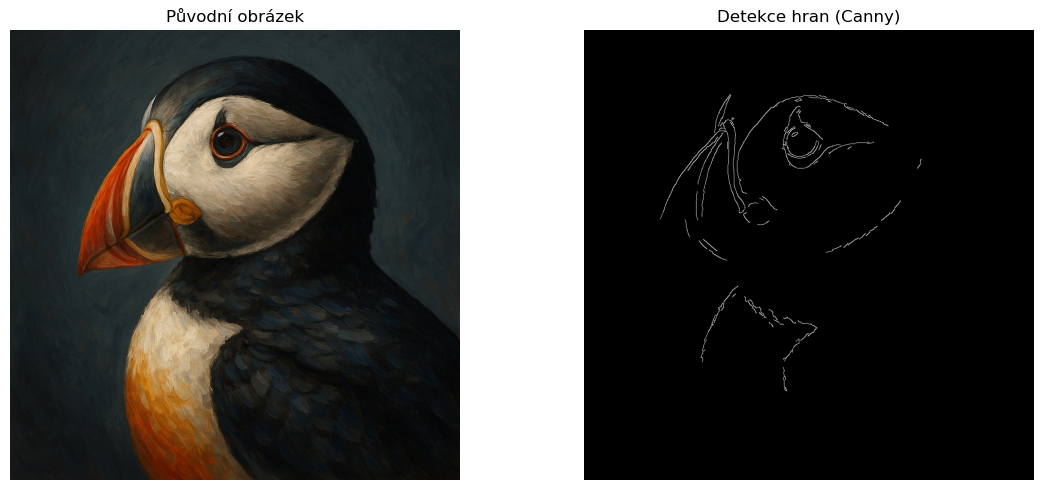

In [5]:
# Import požadovaných knihoven
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 🔽 Načtení obrázku (nahraď názvem souboru, např. "godzilla.jpg")
image = cv2.imread('obrazek.png')

# Kontrola načtení
if image is None:
    raise FileNotFoundError("Obrázek 'obrazek.png' nebyl nalezen. Zkontrolujte cestu k souboru.")

# 🎨 Převod z BGR (OpenCV standard) do RGB (pro matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 👁️ Zobrazení originálního obrázku
'''
plt.imshow(image_rgb)
plt.title('Původní obrázek')
plt.axis('off')
plt.show()
'''

# ⚙️ Převod na odstíny šedi
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 🔍 Rozmazání pomocí Gaussova filtru pro odstranění šumu
blurred = cv2.GaussianBlur(gray_image, (5, 5), 0)

# 📐 Detekce hran pomocí Canny algoritmu
edges = cv2.Canny(blurred, threshold1=100, threshold2=200)

# 🖼️ Vizualizace výsledků
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Původní obrázek')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Detekce hran (Canny)')
plt.axis('off')

plt.tight_layout()
plt.show()


# Extrakce příznaků ze zvuku pomocí MFCC (librosa)

Tento skript demonstruje základní postup předzpracování zvuku a extrakce příznaků pro modely strojového učení v oblasti zvuku. Prvním krokem je načtení zvuku ve formátu waveform, následně vizualizace a konečně výpočet MFCC – což je vektor příznaků, který napodobuje lidské vnímání zvuku a je široce využíván v aplikacích jako rozpoznávání řeči, klasifikace hudby nebo detekce zvuků v prostředí (např. na ESP32-S3 s mikrofonem).





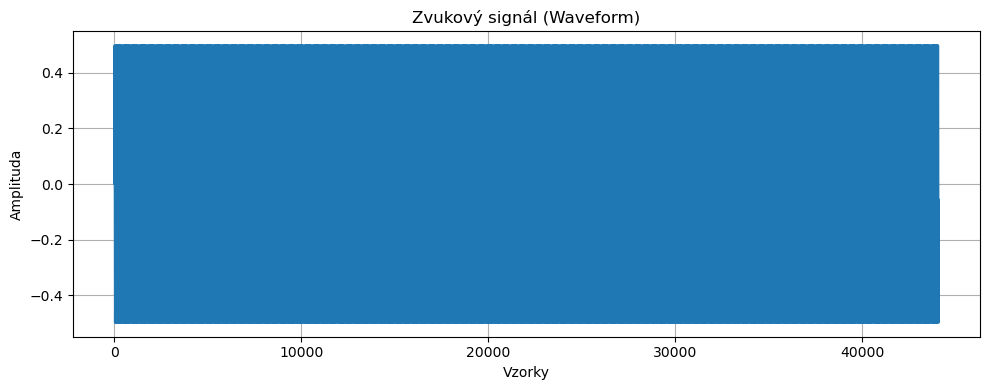

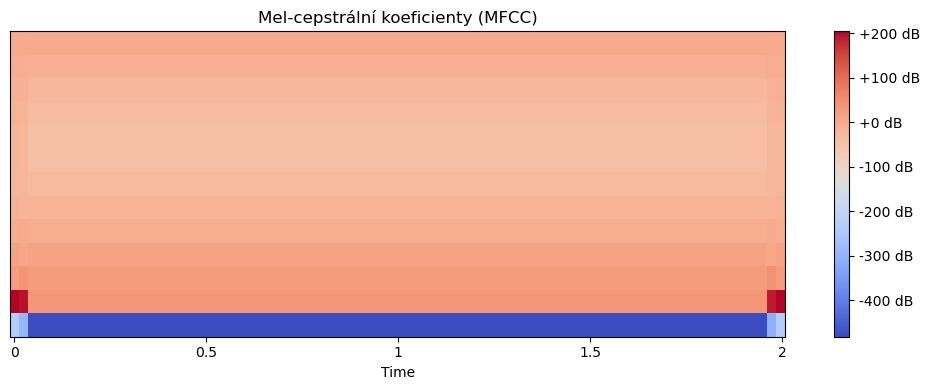

In [6]:
# Import potřebných knihoven
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# 🟡 Načtení zvukového souboru
# Nahraď "audio_sample.wav" vlastním zvukovým souborem (např. ve formátu WAV)
audio_path = 'audio_data.wav'

# Librosa načte první 10 sekund zvuku a vrátí signál (y) a vzorkovací frekvenci (sr)
y, sr = librosa.load(audio_path, duration=10)

# 📈 Vykreslení vlnového průběhu
plt.figure(figsize=(10, 4))
plt.plot(y)
plt.title('Zvukový signál (Waveform)')
plt.xlabel('Vzorky')
plt.ylabel('Amplituda')
plt.grid(True)
plt.tight_layout()
plt.show()

# 🎼 Výpočet MFCC (Mel Frequency Cepstral Coefficients)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# 🖼️ Zobrazení MFCC jako spektrogramu
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-cepstrální koeficienty (MFCC)')
plt.tight_layout()
plt.show()
